# Recent Earthquakes in the South West of Iceland

With an increased activity in earthquakes on the south west corner of Iceland it is interesting to dive a little bit deeper into it and look at how the activity is. Experts are saying that an eruption could be imminent but why do they believe it is so. Lets look at the data and try to see what they see.

This Jupyter Notebook will utilize tools and techniques tought in the ['Data Analysis with Python: Zero to Pandas'](zerotopandas.com) course. 

The data was retrieved from the [Icelandic Meteorological Office](https://www.vedur.is/skjalftar-og-eldgos/jardskjalftar/reykjanesskagi/#view=table) on Thursday 04.03.21 at 13:45 GMT and showcases seismic activity in the area in the last 48 hours.

## Preperation and Downloading the Dataset

In order to be able to run the code below we need to setup the environment. We start by making sure that we have all necessary python libraries installed and imported into the notebook.

In [1]:
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

In [2]:
import jovian
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

project_name = 'earthquake_sw_iceland'
jovian.commit(project=project_name)

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "joeolafs/earthquake-sw-iceland" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/joeolafs/earthquake-sw-iceland


Now that we have imported the libraries needed to analyse and display the data and set some parameters for the graphs we can move forward.

Let's begin by loading the dataset.
As this dataset is not available online I had to create an excel file prior to writing this.

In [3]:
quake_data_df = pd.read_csv('EarthquakeData.csv', low_memory=False)

In [79]:
quake_data_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
0,Thur,2021-03-04,13:37:35,63.883,-22.362,4.4,0.2,90.01
1,Thur,2021-03-04,13:36:16,63.874,-22.268,2.3,1.9,90.02
2,Thur,2021-03-04,13:34:01,63.929,-21.878,4.9,0.3,63.10
3,Thur,2021-03-04,13:32:13,63.908,-22.234,4.2,0.5,42.23
4,Thur,2021-03-04,13:30:57,63.900,-22.260,4.0,1.0,90.03
...,...,...,...,...,...,...,...,...
2462,Tue,2021-03-02,13:49:42,63.880,-22.400,2.3,0.3,99.00
2463,Tue,2021-03-02,13:47:25,63.932,-22.179,5.6,1.8,99.00
2464,Tue,2021-03-02,13:42:38,63.926,-22.205,5.3,1.6,99.00
2465,Tue,2021-03-02,13:41:06,63.918,-22.205,5.7,0.6,63.77


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

After getting the dataset we can start preparing subsets of it and do some sort the data into new variables that we will need to use.



In [6]:
strength_df = quake_data_df[['Size']]
strength_describtion = strength_df.describe()
strength_top = quake_data_df.sort_values('Size', ascending=False).head(10)
strong_quakes_df = quake_data_df[quake_data_df.Size > 3.0]
strength_above_df = quake_data_df[quake_data_df.Size > 1.5]

In [7]:
daily_quake_df = quake_data_df.groupby('Day')[['Size']].mean()
daily_quake_df = daily_quake_df.reindex(['Tue', 'Wed', 'Thur'])

In [8]:
deepest_df = quake_data_df.sort_values('Depth', ascending=False).head(10)
quake_data_df['Neg_Depth'] = quake_data_df['Depth'] * -1
shallow_quakes_df = quake_data_df[quake_data_df.Depth < 20.0]

In [9]:
quality_high_df = quake_data_df[quake_data_df.Quality >= 95.0]
quality_low_df = quake_data_df[quake_data_df.Quality < 99.0]
quality_low_describtion = quality_low_df[['Quality']].describe()

In [114]:
wed_data_df = quake_data_df[quake_data_df.Day == 'Wed'].copy()
wed_data_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
1016,Wed,2021-03-03,23:58:41,63.859,-22.613,6.3,1.7,81.79
1017,Wed,2021-03-03,23:56:26,63.895,-22.284,2.0,1.3,78.80
1018,Wed,2021-03-03,23:55:00,63.903,-22.259,6.0,0.6,35.70
1019,Wed,2021-03-03,23:54:12,63.890,-22.286,2.1,1.4,38.17
1020,Wed,2021-03-03,23:53:30,63.893,-22.282,7.1,1.4,90.01
...,...,...,...,...,...,...,...,...
2131,Wed,2021-03-03,0:13:21,63.900,-22.277,5.3,0.4,62.10
2132,Wed,2021-03-03,0:09:51,63.908,-22.246,5.7,0.3,78.85
2133,Wed,2021-03-03,0:08:08,63.905,-22.242,6.7,1.4,99.00
2134,Wed,2021-03-03,0:06:19,63.920,-22.204,5.7,1.5,99.00


## Exploratory Analysis and Visualization

We can start off by analysing the data and looking at what we have. We brake up the data and look at one or two parts of it at a time.



#### Size of earthquakes
For the first part we can simply take a look at the total number of earthquakes that have been in the south western area of Iceland in the last 48 hours. By looking at the histogram, displayed below, we can see the ammount at a given strength on the Richter magnitude scale.

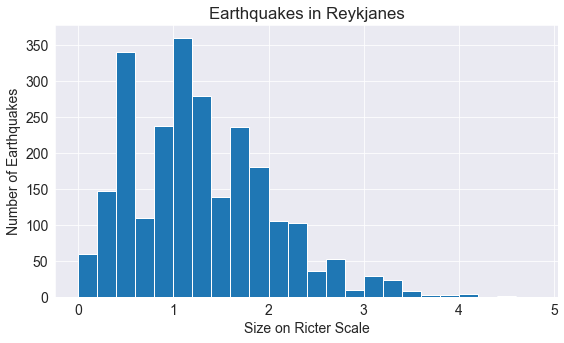

In [11]:
plt.title('Earthquakes in Reykjanes');
plt.hist(quake_data_df.Size, bins=np.arange(0, 5, 0.2));
plt.xlabel('Size on Ricter Scale');
plt.ylabel('Number of Earthquakes');

We can see that most of the earthquakes are below 2 on the Richter magnitude scale but there are a few that. In the table below you can see a list of the 10 strongest earthquakes. Below that there is a table that shows the total number of eathquakes average size and other interesting data about the size of them.

In [12]:
strength_top

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
320,Thur,2021-03-04,8:54:07,63.891,-22.256,6.7,4.5,99.0
935,Thur,2021-03-04,0:59:08,63.900,-22.253,6.4,4.1,99.0
2083,Wed,2021-03-03,2:12:01,63.911,-22.229,5.4,4.1,99.0
1703,Wed,2021-03-03,15:11:20,63.901,-22.262,6.6,4.0,99.0
549,Thur,2021-03-04,5:44:57,63.897,-22.255,6.1,4.0,99.0
590,Thur,2021-03-04,5:17:54,63.896,-22.281,5.6,3.9,99.0
563,Thur,2021-03-04,5:36:17,63.898,-22.309,5.7,3.9,99.0
1870,Wed,2021-03-03,11:05:04,63.933,-22.185,7.0,3.8,99.0
684,Thur,2021-03-04,4:04:01,63.894,-22.273,5.5,3.6,99.0
1400,Wed,2021-03-03,19:04:27,63.898,-22.281,5.4,3.6,99.0


In [13]:
strength_describtion

,Size
count,2467.000000
mean,1.275638
std,0.722455
min,0.100000
25%,0.700000
50%,1.200000
75%,1.700000
max,4.500000


#### Location
As we are only looking at the recent activity in the South Western Iceland we are analysing data in a fairly small area. However the earthquakes are clustered into a particular area. As seen on the scatter plot below, majority of the earthquakes happen between 63.8N & 64.0N latitude and 22.5W & 22.0W longitude. This is on the south base of a volcano called Keilir and it is in that area that experts are anticipating an eruption, if there will be one.

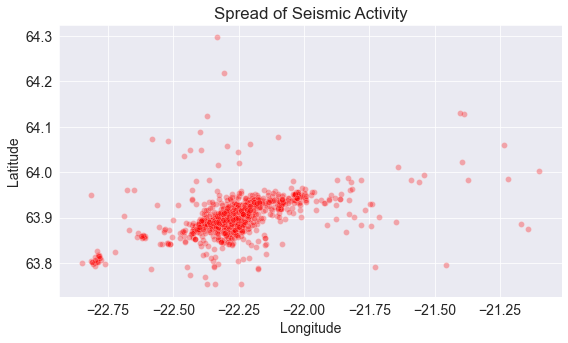

In [14]:
plt.title("Spread of Seismic Activity")
sns.scatterplot(x=quake_data_df.Longitude,
                y=quake_data_df.Latitude,
                alpha=0.3,
                color='r');

#### Depth
When talking about the depth of earthquakes, it can be categorised into three categories. All the earthquakes in this dataset are so called shallow earthquakes, meaning that they take place at a depth less than 70km. The table below lists the 10 deepest quakes measured.

In [15]:
deepest_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
1398,Wed,2021-03-03,19:06:35,63.753,-22.339,40.9,0.6,34.57
1162,Wed,2021-03-03,22:02:38,63.796,-21.456,27.9,1.5,47.75
2338,Tue,2021-03-02,16:42:51,64.068,-22.520,26.2,1.9,90.02
601,Thur,2021-03-04,5:09:36,63.797,-22.331,23.9,0.4,64.19
480,Thur,2021-03-04,6:27:51,64.073,-22.583,23.1,1.3,37.41
364,Thur,2021-03-04,8:11:09,63.983,-22.362,21.3,0.6,43.17
812,Thur,2021-03-04,2:15:57,63.793,-22.345,19.3,1.0,90.01
638,Thur,2021-03-04,4:36:26,64.088,-22.399,18.9,0.4,42.53
2147,Tue,2021-03-02,23:38:26,63.868,-22.271,18.3,0.1,67.97
472,Thur,2021-03-04,6:32:05,63.774,-22.437,18.0,1.2,90.01


As seen on the table, only six of the earthquakes measured are deeper than 20km below the surface. Because of this I sorted out those datapoints and the histogram below displays how many earthquakes have been at each depth level. A majority of the earthquakes have been at a depth less than 7.5Km with close to 400 at a depth less than 2.5Km.

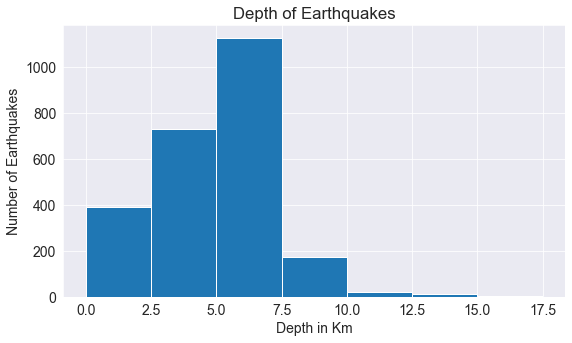

In [16]:
plt.hist(shallow_quakes_df.Depth, bins=np.arange(0, 20, 2.5));
plt.title('Depth of Earthquakes');
plt.xlabel('Depth in Km');
plt.ylabel('Number of Earthquakes');

#### What does one day look like?
Due to the database only having measurements over 48 hours we only have one full day of data. In order to see a graph of how that day looks we must isolate the measurements taken on Wednesday, 2021,03,03. Once that is done we can plot them using a bar graph as seen below.
As we are only looking at data from one day, the count starts at 1016 instead of 0. 

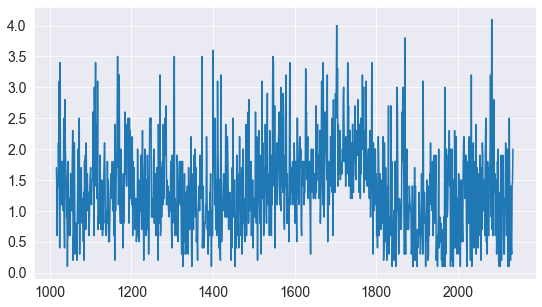

In [87]:
plt.plot(wed_quakes_size);

#### Quality
When the earthquakes get measured they receive a quality rating. This quality rating can vary depending on factors such as wether they triggered one or more sensors, depth, strength and others. Once the data has been looked over and verified they receive a rating of 99%. When preparing the data we created a new dataframe than excludes data that has been verified.

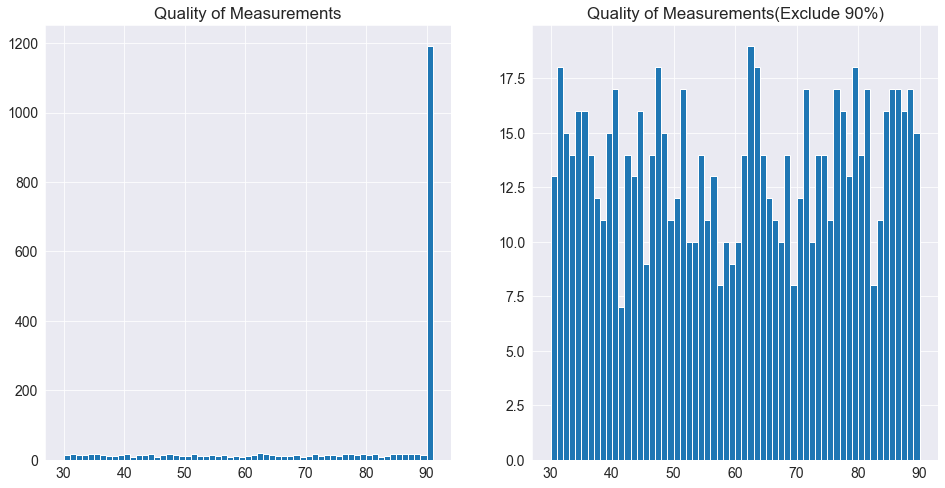

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].hist(quality_low_df.Quality, bins=np.arange(30, 92, 1));
axes[0].set_title('Quality of Measurements');
axes[1].hist(quality_low_df.Quality, bins=np.arange(30,91,1));
axes[1].set_title('Quality of Measurements(Exclude 90%)');

By looking at the histograms we can see that a majority gets a quality measurement of 90%. On the right subplot we can see the distribution of measurements that are below 90%. In the table below we can see that the average quality rating is 79.99% with a minimum of 30.1% and a maximum of 90.08%.

In [18]:
quality_low_describtion

,Quality
count,2005.000000
mean,77.993222
std,18.515363
min,30.100000
25%,68.210000
50%,90.010000
75%,90.020000
max,90.080000


In the table below we can see that 462 measurements have been verified and given a quality rating of 99%

In [19]:
quality_high_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality,Neg_Depth
41,Thur,2021-03-04,12:54:46,63.894,-22.270,5.3,3.5,99.0,-5.3
50,Thur,2021-03-04,12:45:48,63.874,-22.411,2.8,2.8,99.0,-2.8
51,Thur,2021-03-04,12:45:35,63.896,-22.262,7.0,2.8,99.0,-7.0
71,Thur,2021-03-04,12:30:12,63.871,-22.427,0.9,1.4,99.0,-0.9
72,Thur,2021-03-04,12:29:38,63.875,-22.415,2.7,1.5,99.0,-2.7
...,...,...,...,...,...,...,...,...,...
2459,Tue,2021-03-02,13:51:51,63.914,-22.241,0.1,1.2,99.0,-0.1
2462,Tue,2021-03-02,13:49:42,63.880,-22.400,2.3,0.3,99.0,-2.3
2463,Tue,2021-03-02,13:47:25,63.932,-22.179,5.6,1.8,99.0,-5.6
2464,Tue,2021-03-02,13:42:38,63.926,-22.205,5.3,1.6,99.0,-5.3


Let us save and upload our work to Jovian before continuing

In [20]:
import jovian

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "joeolafs/earthquake-sw-iceland" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/joeolafs/earthquake-sw-iceland


'https://jovian.ai/joeolafs/earthquake-sw-iceland'

## Asking and Answering Questions

Now that we have looked at some of the data and how it is measured we can start doing some calculations from it and see how one measurement is related to another.

#### Is there a difference in average size between days?

Considering that this series of earthquakes has been going on for a few days it would be interesting to see if there is an increase in the average strength between days. As seen in the table and on graph below the change is insignificant between the days. The problem with the data we are currently using is that it is very limited (only 48 hours from retrieving the data).

While preparing the data earlier we used Pandas to create a new dataframe and the function mean() to calculate the average size of earthquakes each day. Additionally we use a pandas function reindex() to ensure the order of days is correct.

To greate the graph we use Matplotlib, the bar(), plot() and title() functions. These three functions combined create the bargraph, the line plot and the title above the graph.

In [22]:
daily_quake_df

,Size
Day,
Tue,1.045015
Wed,1.364464
Thur,1.252854


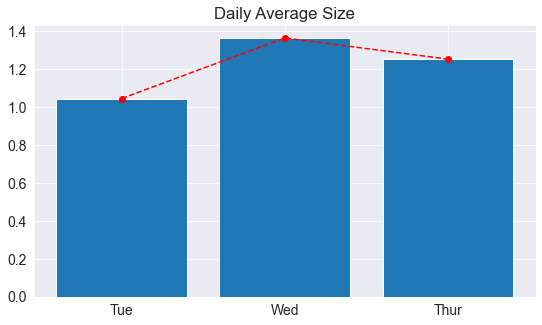

In [23]:
plt.bar(daily_quake_df.index, daily_quake_df.Size);
plt.plot(daily_quake_df.index, daily_quake_df.Size, 'o--r');
plt.title('Daily Average Size');

#### Is there a relationship between size of earthquakes and their depth?

One thing that I have often wondered about when there has been a period of increased seismic activity in Iceland is wether not there is a relationship between the depth of the earthquake and the it's strength on the Richter scale. 
By using the scatterplot() function from the Seaborn library it is simple to look at the relationship.

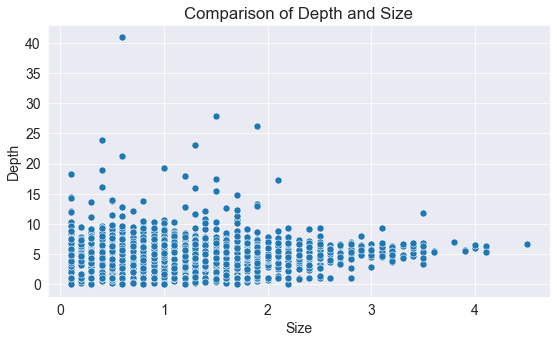

In [24]:
plt.title('Comparison of Depth and Size')
sns.scatterplot(x=quake_data_df.Size,
                y=quake_data_df.Depth,
                s=50);

This plot shows us that there does not seem to a correlation between the depth of the earthquakes and the strength. And that leads us into the next question.

#### Is there a relationship between the size of the earthquake and the quality of the measurement?

In order to compare the quality and strength of each earthquake we can again use the Seaborn scatterplot.

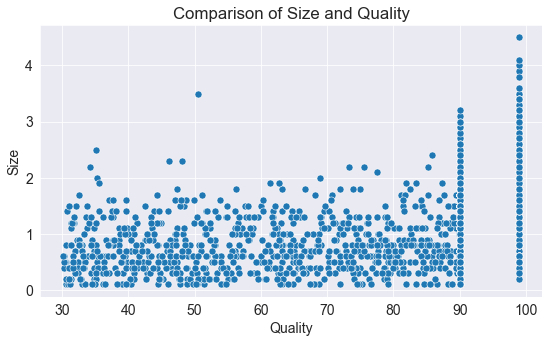

In [25]:
plt.title('Comparison of Size and Quality')
sns.scatterplot(x=quake_data_df.Quality,
                y=quake_data_df.Size,
                s=50);

#### How where do the earthquakes take place?

By creating a 3D plot we can see where each earthquake takes place. Matplotlib offers tools to create a 3D plot and we can utilise these tools to analyse the location of the earthquakes. As seen on the graph, and in the analysis earlier, majority of the earthquakes are clustered close to the surface and in a fairly small area.

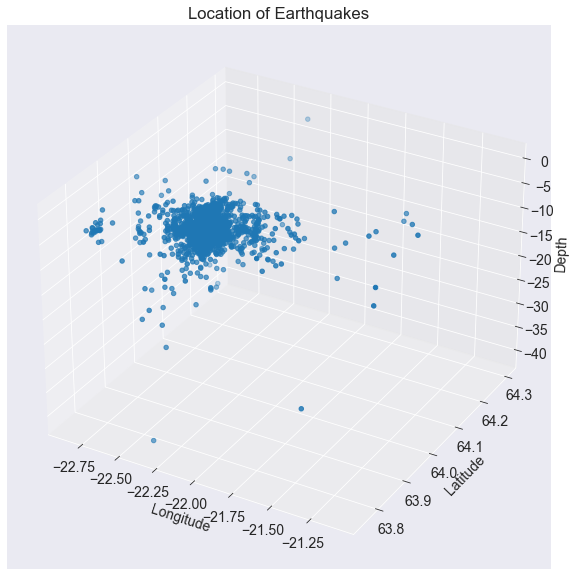

In [26]:
ax=plt.figure(figsize=(10,10)).add_subplot(111, projection='3d')
ax.scatter(quake_data_df.Longitude, quake_data_df.Latitude, quake_data_df.Neg_Depth);
ax.set_xlabel('Longitude');
ax.set_ylabel('Latitude');
ax.set_zlabel('Depth');
ax.set_title('Location of Earthquakes');

#### How is the average earthquake?

For the purpose of this we will remove a few outliers, measurements that are deepert than most and earthquakes that are below 1.5 on the Richter scale. When preparing the data earlier I used methods from the Pandas library to create new dataframes that do not include the outliers. 

In [27]:
avg_depth=shallow_quakes_df.Neg_Depth.mean()
avg_lat=shallow_quakes_df.Latitude.mean()
avg_long=shallow_quakes_df.Longitude.mean()
avg_size=strength_above_df.Size.mean()
#df=pd.DataFrame({'A':[avg_long],'b':[avg_lat]})
avg_df=pd.DataFrame({'Size':[avg_size], 'Depth':[avg_depth], 'Latitude':[avg_lat], 'Longitude':[avg_long]})
avg_df

,Size,Depth,Latitude,Longitude
0,2.1,-4.94039,63.902456,-22.254033


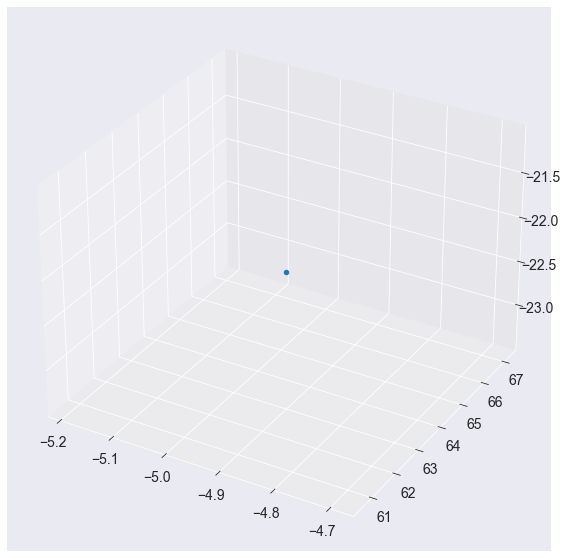

In [28]:
ax=plt.figure(figsize=(10,10)).add_subplot(111, projection='3d')
ax.scatter(avg_depth,avg_lat,avg_long);

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [33]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [115]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "joeolafs/earthquake-sw-iceland" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/joeolafs/earthquake-sw-iceland
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
